In [1]:
from scipy import stats
from scipy.io import loadmat
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sbn
import matplotlib.cm as cm
from Funciones_auxiliares import Mat_to_dataframe,see_teams,get_cluster_indexs,plot_branch,plot_teams
from scipy import cluster
import scipy as sp
import math
from scipy.spatial.distance import squareform
import itertools
import chart_studio.plotly as plotly


In [2]:
plt.close('all')
plt.clf()
plt.close()
'''Mat file to dataframe for working in python'''
NOISE = pd.read_pickle('NOISE')
NEURON = pd.read_pickle('NEURON')
NOISE_MAYBE = pd.read_pickle('Noise_Maybe')

In [3]:
df = pd.concat([NOISE,NEURON],ignore_index = True,sort = False)
lenght = len(df.Mean)

In [4]:
''''Matrix Initialization'''
Mean = []
for i in range(len(df.Mean)):
    Mean.append(df.Mean[i])

In [5]:
Correlation_p = np.zeros((lenght,lenght))
P_Value_p = np.zeros((lenght,lenght))

In [6]:
'''Pearson tests'''
for i in range(lenght):
    for j in range(lenght):
        Correlation_p[i,j],P_Value_p[i,j] = stats.pearsonr(df.Mean[i],df.Mean[j])

In [36]:
threshold2 = 0.9## For Pearson is defined as 1 - correlation

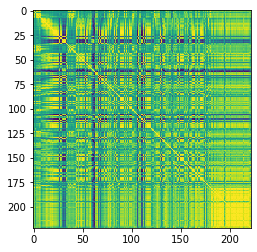

In [15]:
plt.imshow(Correlation_p)

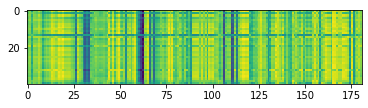

In [35]:
Good_Bad_correlation = Correlation_p[len(NOISE)+1:,:len(NOISE)]
plt.imshow(Good_Bad_correlation)

In [40]:
mixed = np.where(Good_Bad_correlation > threshold2)
len(mixed[0])

28

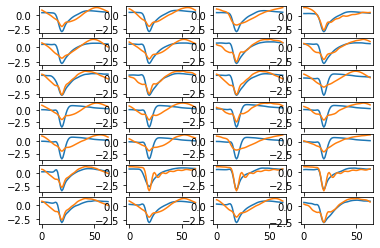

In [43]:
fig = plt.figure(1)
axes = fig.subplots(7,4)
axes_flt = axes.flatten()
for i in range(len(mixed[0])):
    axes_flt[i].plot(df.Mean.iloc[len(NOISE) +mixed[0][i]])
    axes_flt[i].plot(df.Mean.iloc[mixed[1][i]])